In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

from sklearn.preprocessing import RobustScaler

In [2]:
df_train = pd.read_csv("preprocessed_train.csv", encoding="euc-kr")

In [3]:
df_test = pd.read_csv("preprocessed_test.csv", encoding="euc-kr")

In [4]:
df_train.head()

분석데이터  label  numstrings   avlength  printables   entropy  paths  urls  \
0      1      1         144  12.298611        1771  5.356616      0     0   
1      2      1         804   9.580846        7703  6.063542      0     0   
2      3      0        2205  12.736054       28083  6.107050      9     0   
3      4      0        2602  10.288240       26770  5.373013      8     0   
4      5      1        8980  23.252339      208806  5.775223      0    28   

   registry  MZ  ...  dist_86  dist_87  dist_88  dist_89  dist_90  dist_91  \
0         0   1  ...       10        4       10        9        4        0   
1         0   6  ...       43      121       84       78       47       36   
2         0   6  ...      326      268      239      286      199      148   
3         0   1  ...      336      230      206      245       76        0   
4        16   3  ...      731      882     1171     1010      322       64   

   dist_92  dist_93  dist_94  dist_95  
0        1        0        0        0  
1       40       45       27       36  
2      154       37       48       36  
3       26      702        1        5  
4      327       84       75      244  

[5 rows x 618 columns]

In [5]:
df_test.head()

분석대상  numstrings   avlength  printables   entropy  paths  urls  registry  \
0     1        5063   9.419514       47691  5.630504      6     1         1   
1     2        5347  15.560875       83204  5.773314      0     2        14   
2     3        4523  11.875083       53711  6.146246      0    37         0   
3     4        6174   7.378037       45552  6.473256      0     1        17   
4     5          22   7.090909         156  5.324630      0     0         0   

   MZ    a_0  ...  dist_86  dist_87  dist_88  dist_89  dist_90  dist_91  \
0  11  68704  ...      212     4485      451      312      128      159   
1   4   4026  ...      824      492     1159      574       90       25   
2   1  65732  ...      249      307      372      289      115       90   
3  13  30028  ...      366      441      363      469      331      272   
4   1  22922  ...        0        1        3        0        0        0   

   dist_92  dist_93  dist_94  dist_95  
0      135      283      101      277  
1       47       22       26       27  
2      248       95      118       77  
3      457      311      320      291  
4        0        0        0        0  

[5 rows x 617 columns]

In [6]:
df_train.dtypes

분석데이터           int64
label           int64
numstrings      int64
avlength      float64
printables      int64
               ...   
dist_91         int64
dist_92         int64
dist_93         int64
dist_94         int64
dist_95         int64
Length: 618, dtype: object

In [7]:
df_train.describe()

분석데이터         label     numstrings      avlength    printables  \
count  10000.00000  10000.000000   10000.000000  10000.000000  1.000000e+04   
mean    5000.50000      0.550000    7621.989900     32.923504  1.188649e+05   
std     2886.89568      0.497519   16092.005358    562.748041  3.576147e+05   
min        1.00000      0.000000       2.000000      5.212620  4.500000e+01   
25%     2500.75000      0.000000     415.000000      7.714984  5.313250e+03   
50%     5000.50000      1.000000    2211.500000     12.529612  2.409850e+04   
75%     7500.25000      1.000000    6897.000000     18.178302  8.898925e+04   
max    10000.00000      1.000000  419974.000000  54476.277500  2.179051e+07   

            entropy         paths          urls      registry           MZ  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000   
mean       5.752056      2.503300     10.695300      0.407900     17.63430   
std        0.732330    100.323858     44.882713      2.358617     73.92403   
min        0.179707      0.000000      0.000000      0.000000      1.00000   
25%        5.432412      0.000000      0.000000      0.000000      1.00000   
50%        5.833999      0.000000      0.000000      0.000000      3.00000   
75%        6.346307      1.000000      2.000000      0.000000     12.00000   
max        6.584918   9897.000000   2221.000000     79.000000   5266.00000   

       ...        dist_86        dist_87        dist_88        dist_89  \
count  ...   10000.000000   10000.000000   10000.000000   10000.000000   
mean   ...    1128.550900    1229.965600    1429.139200    1682.420400   
std    ...    4787.165537    5215.851088    5590.423403    6336.450355   
min    ...       0.000000       0.000000       0.000000       0.000000   
25%    ...      36.000000      36.000000      37.000000      49.000000   
50%    ...     186.000000     200.000000     179.000000     203.000000   
75%    ...     617.500000     978.000000     808.000000     852.000000   
max    ...  339559.000000  340706.000000  340510.000000  339554.000000   

             dist_90      dist_91       dist_92       dist_93       dist_94  \
count   10000.000000  10000.00000  10000.000000  10000.000000  10000.000000   
mean     2252.491100    299.35240    366.571300    297.272100    303.461600   
std     11934.968048   1116.21856    908.081633   1053.233593    774.618653   
min         0.000000      0.00000      0.000000      0.000000      0.000000   
25%        11.000000      5.00000      7.000000      5.000000      5.000000   
50%        87.000000     49.00000     74.000000     50.000000     48.000000   
75%       389.250000    217.00000    286.250000    218.000000    212.250000   
max    340047.000000  84834.00000  37602.000000  53534.000000  24463.000000   

            dist_95  
count  10000.000000  
mean     296.650700  
std      790.569079  
min        0.000000  
25%        5.000000  
50%       49.000000  
75%      234.250000  
max    24508.000000  

[8 rows x 618 columns]

## 1. 결측값 찾기

In [8]:
df_train.isnull()

분석데이터  label  numstrings  avlength  printables  entropy  paths   urls  \
0     False  False       False     False       False    False  False  False   
1     False  False       False     False       False    False  False  False   
2     False  False       False     False       False    False  False  False   
3     False  False       False     False       False    False  False  False   
4     False  False       False     False       False    False  False  False   
...     ...    ...         ...       ...         ...      ...    ...    ...   
9995  False  False       False     False       False    False  False  False   
9996  False  False       False     False       False    False  False  False   
9997  False  False       False     False       False    False  False  False   
9998  False  False       False     False       False    False  False  False   
9999  False  False       False     False       False    False  False  False   

      registry     MZ  ...  dist_86  dist_87  dist_88  dist_89  dist_90  \
0        False  False  ...    False    False    False    False    False   
1        False  False  ...    False    False    False    False    False   
2        False  False  ...    False    False    False    False    False   
3        False  False  ...    False    False    False    False    False   
4        False  False  ...    False    False    False    False    False   
...        ...    ...  ...      ...      ...      ...      ...      ...   
9995     False  False  ...    False    False    False    False    False   
9996     False  False  ...    False    False    False    False    False   
9997     False  False  ...    False    False    False    False    False   
9998     False  False  ...    False    False    False    False    False   
9999     False  False  ...    False    False    False    False    False   

      dist_91  dist_92  dist_93  dist_94  dist_95  
0       False    False    False    False    False  
1       False    False    False    False    False  
2       False    False    False    False    False  
3       False    False    False    False    False  
4       False    False    False    False    False  
...       ...      ...      ...      ...      ...  
9995    False    False    False    False    False  
9996    False    False    False    False    False  
9997    False    False    False    False    False  
9998    False    False    False    False    False  
9999    False    False    False    False    False  

[10000 rows x 618 columns]

In [9]:
df_train.isnull().sum()

분석데이터         0
label         0
numstrings    0
avlength      0
printables    0
             ..
dist_91       0
dist_92       0
dist_93       0
dist_94       0
dist_95       0
Length: 618, dtype: int64

In [10]:
df_train.isnull().sum().sort_values(ascending=False)

dist_95    0
a_193      0
a_200      0
a_199      0
a_198      0
          ..
b_144      0
b_143      0
b_142      0
b_141      0
분석데이터      0
Length: 618, dtype: int64

In [11]:
df_test.isnull().sum().sort_values(ascending=False)

dist_95    0
a_193      0
a_200      0
a_199      0
a_198      0
          ..
b_144      0
b_143      0
b_142      0
b_141      0
분석대상       0
Length: 617, dtype: int64

결측 값은 없는 것으로 확인됨

## 2. 모든 값이 0인 column 찾기

In [12]:
df_train == 0

분석데이터  label  numstrings  avlength  printables  entropy  paths   urls  \
0     False  False       False     False       False    False   True   True   
1     False  False       False     False       False    False   True   True   
2     False   True       False     False       False    False  False   True   
3     False   True       False     False       False    False  False   True   
4     False  False       False     False       False    False   True  False   
...     ...    ...         ...       ...         ...      ...    ...    ...   
9995  False  False       False     False       False    False   True  False   
9996  False   True       False     False       False    False   True  False   
9997  False   True       False     False       False    False   True   True   
9998  False  False       False     False       False    False   True  False   
9999  False   True       False     False       False    False   True   True   

      registry     MZ  ...  dist_86  dist_87  dist_88  dist_89  dist_90  \
0         True  False  ...    False    False    False    False    False   
1         True  False  ...    False    False    False    False    False   
2         True  False  ...    False    False    False    False    False   
3         True  False  ...    False    False    False    False    False   
4        False  False  ...    False    False    False    False    False   
...        ...    ...  ...      ...      ...      ...      ...      ...   
9995      True  False  ...    False    False    False    False    False   
9996      True  False  ...    False    False    False    False    False   
9997      True  False  ...     True     True     True     True     True   
9998      True  False  ...    False    False    False    False    False   
9999      True  False  ...    False    False    False    False    False   

      dist_91  dist_92  dist_93  dist_94  dist_95  
0        True    False     True     True     True  
1       False    False    False    False    False  
2       False    False    False    False    False  
3        True    False    False    False    False  
4       False    False    False    False    False  
...       ...      ...      ...      ...      ...  
9995    False    False    False    False    False  
9996    False    False    False    False    False  
9997     True     True     True     True     True  
9998    False    False    False    False    False  
9999    False    False    False    False    False  

[10000 rows x 618 columns]

In [13]:
(df_train == 0).all()

분석데이터         False
label         False
numstrings    False
avlength      False
printables    False
              ...  
dist_91       False
dist_92       False
dist_93       False
dist_94       False
dist_95       False
Length: 618, dtype: bool

In [14]:
df_train.columns[(df_train == 0).all()]

Index([], dtype='object')

In [15]:
df_test.columns[(df_test == 0).all()]

Index([], dtype='object')

모든 값이 0인 column도 업음

### 데이터의 분포도 확인

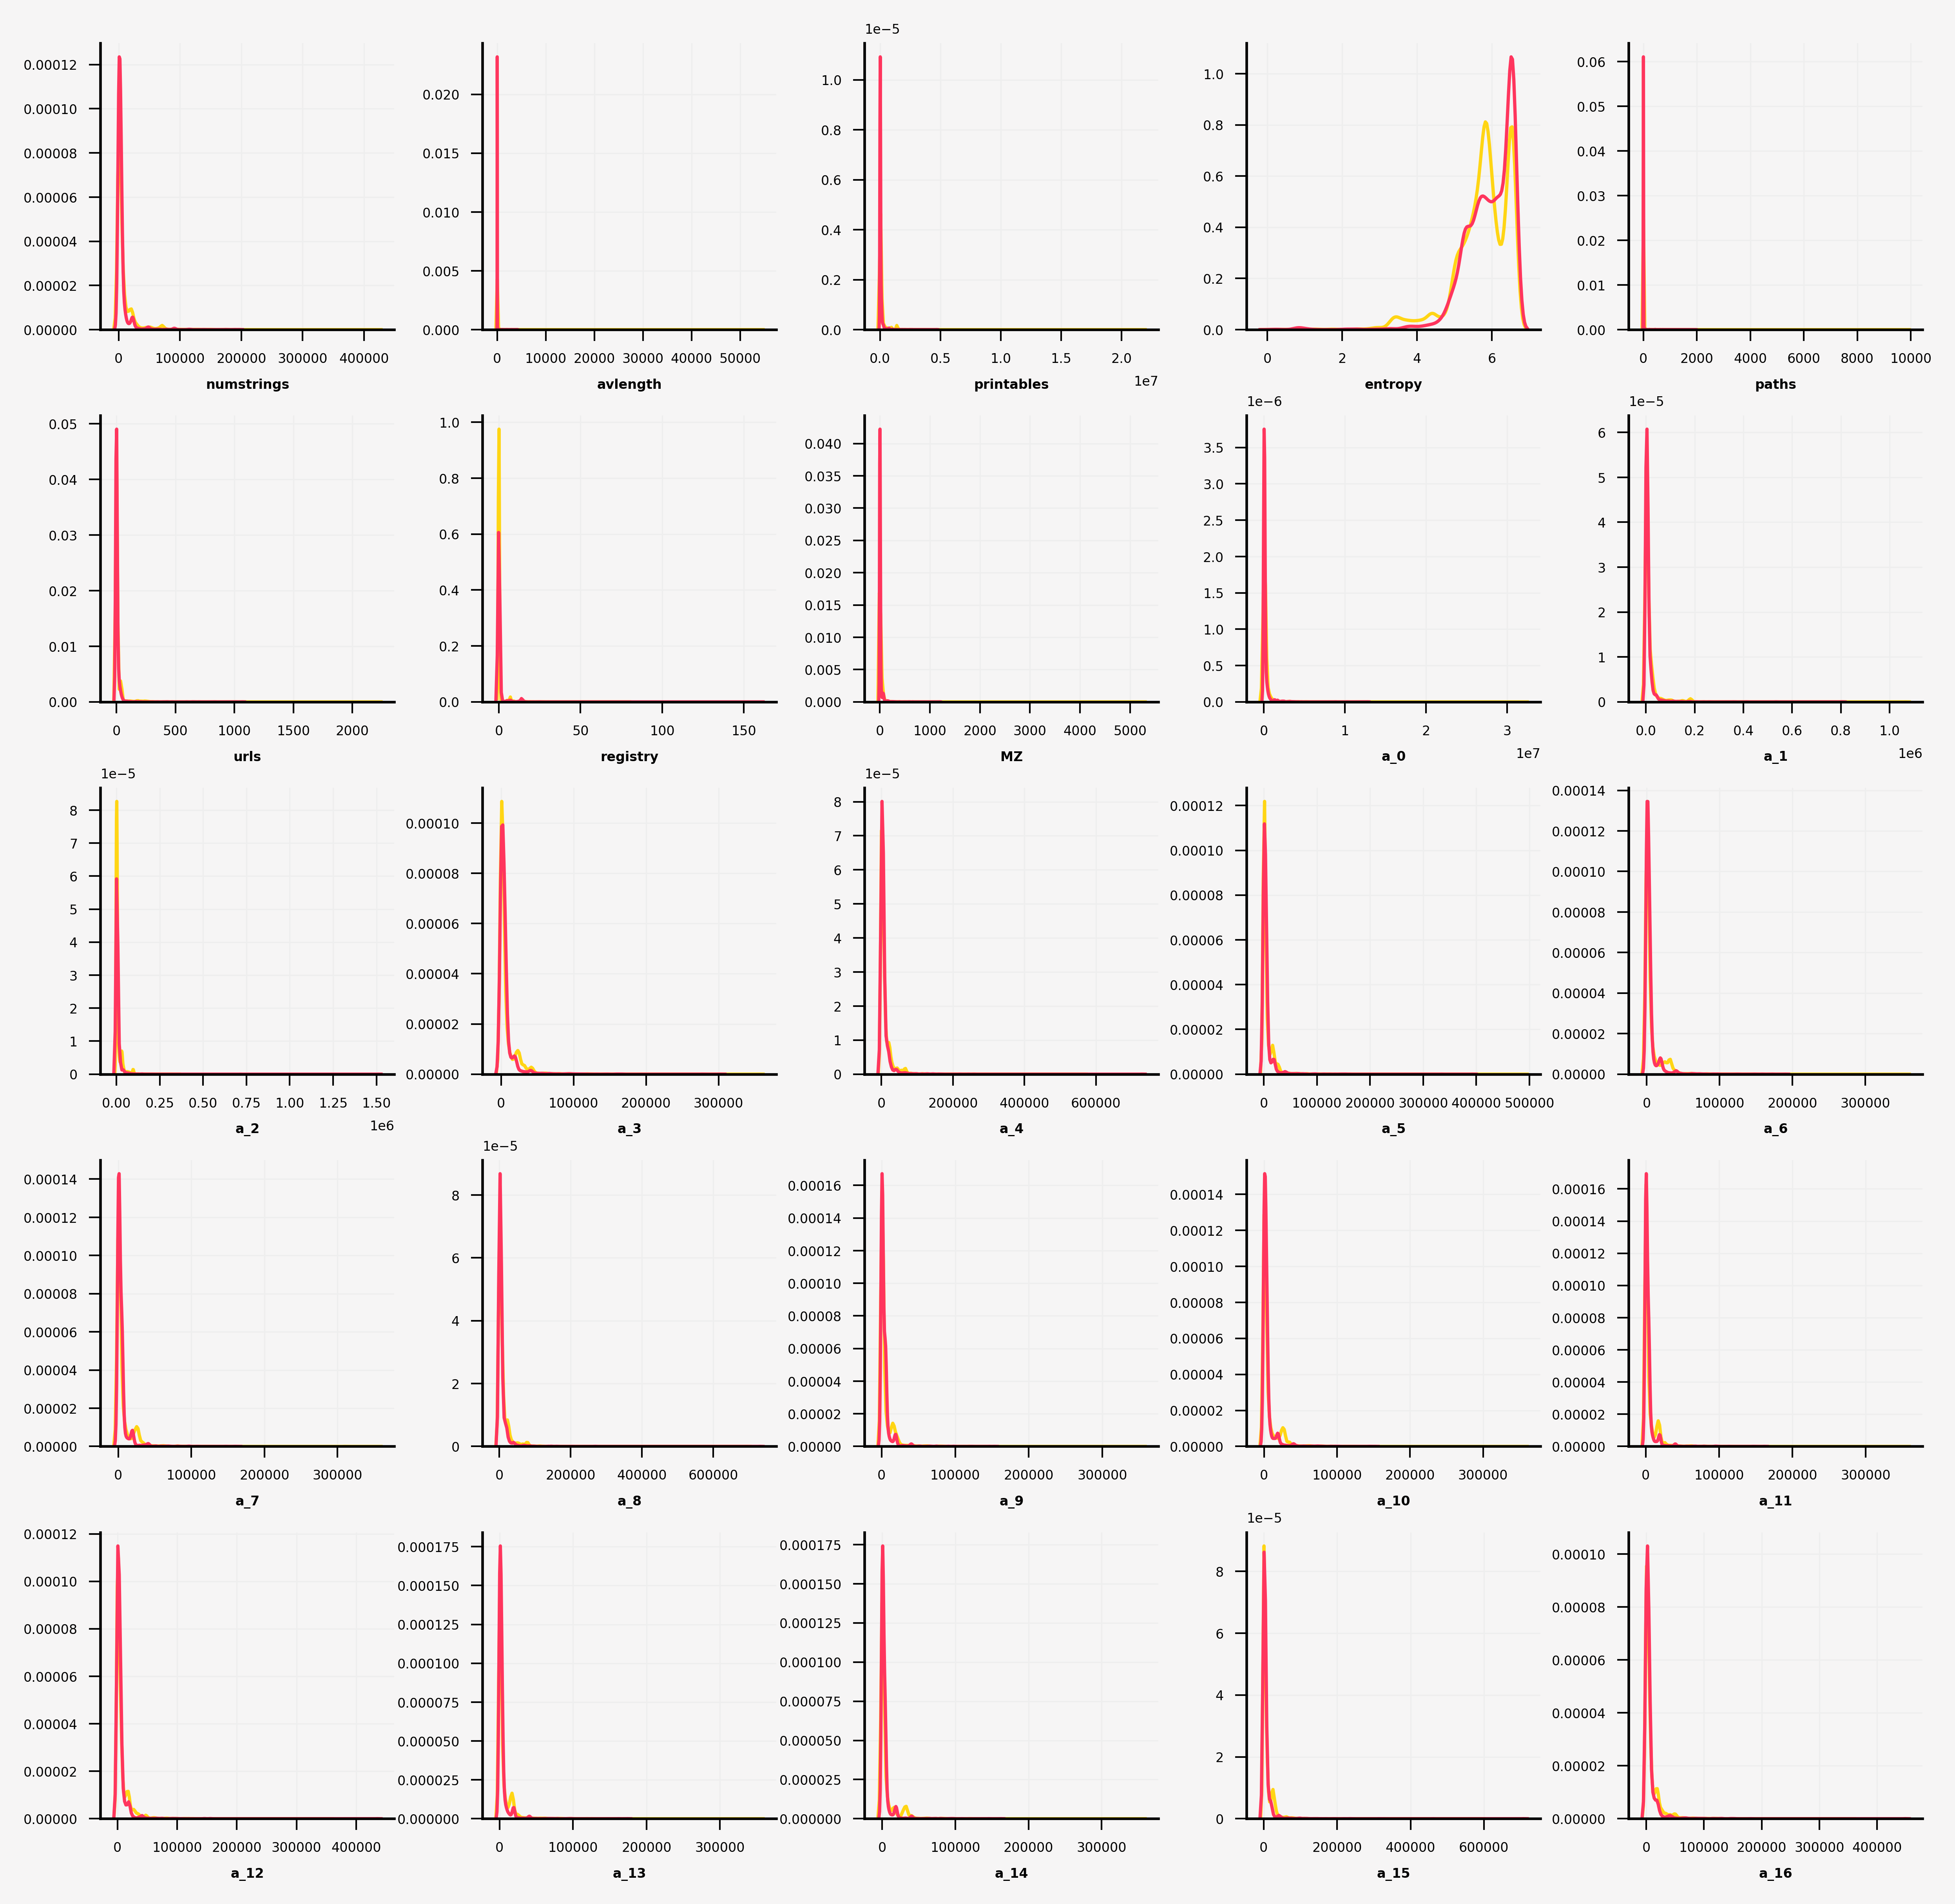

In [16]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

background_color = "#f6f5f5"

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1  
                
features = list(df_train.columns[2:27])

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=df_train[col], zorder=2, alpha=1, linewidth=1, color='#ffd514')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

features = list(df_test.columns[1:26])    
    
run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=df_test[col], zorder=2, alpha=1, linewidth=1, color='#ff355d')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

plt.show()

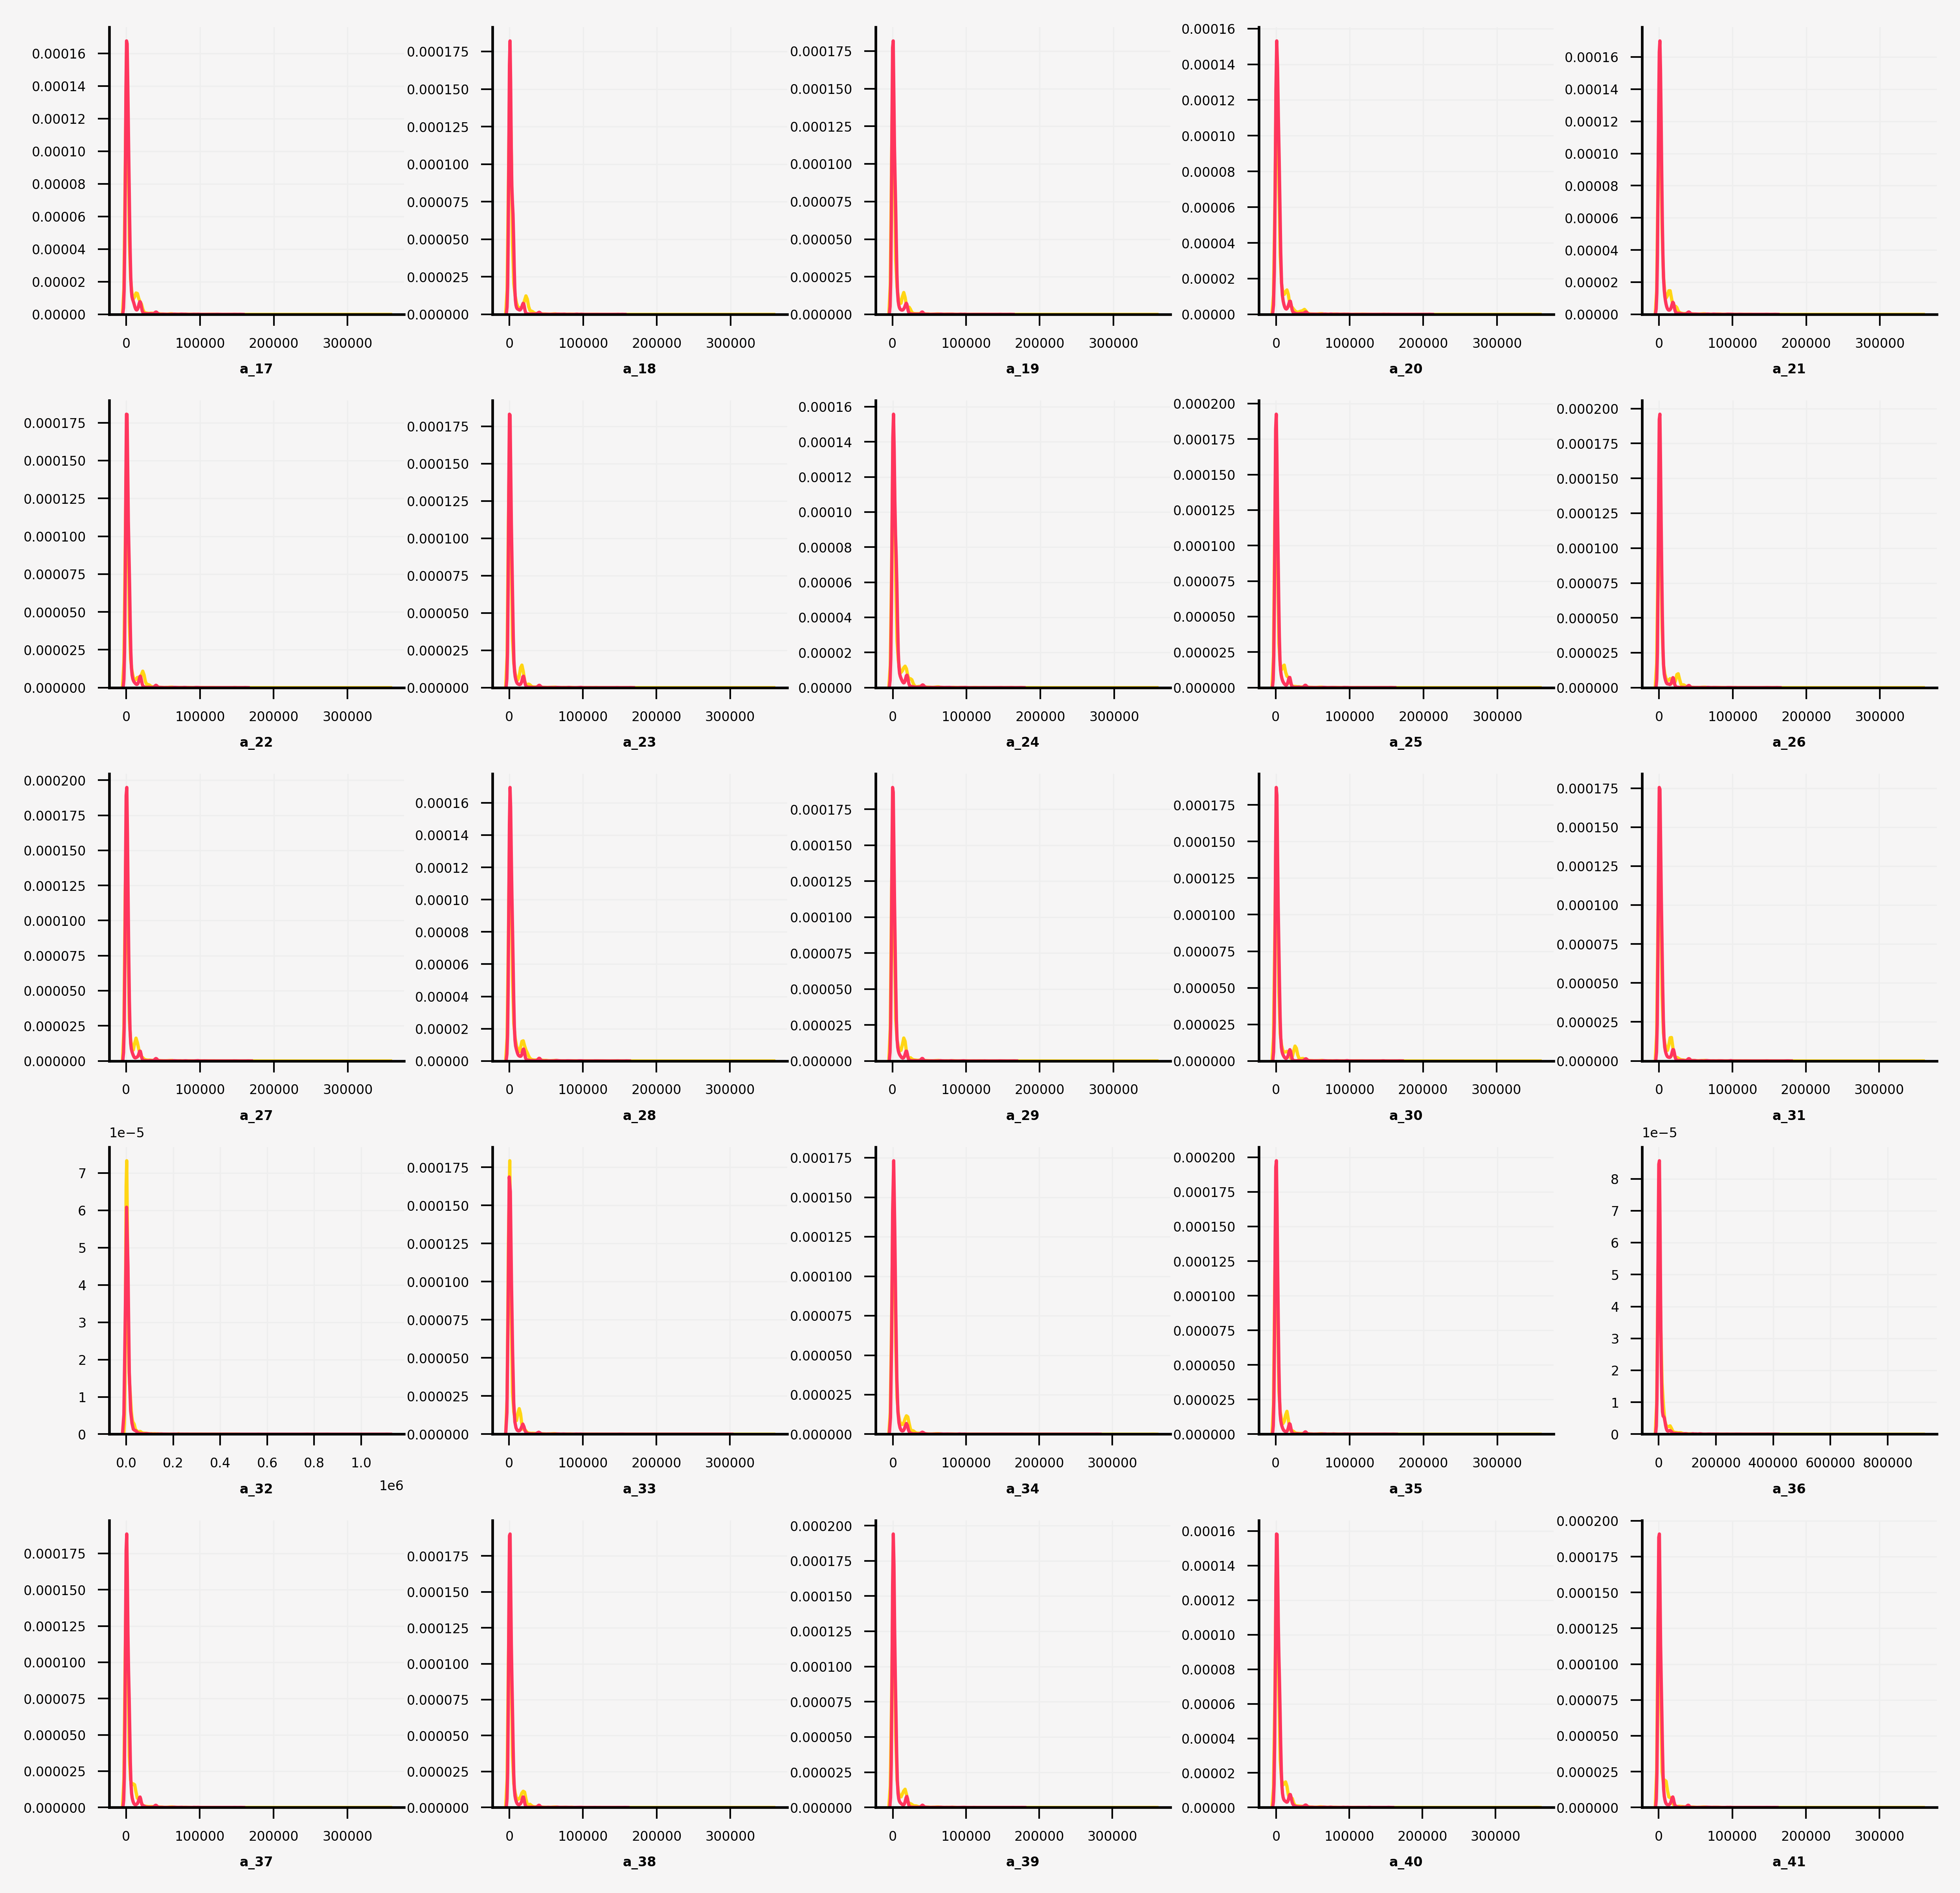

In [17]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

background_color = "#f6f5f5"

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1  
                
features = list(df_train.columns[27:52])

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=df_train[col], zorder=2, alpha=1, linewidth=1, color='#ffd514')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

features = list(df_test.columns[26:51])    
    
run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=df_test[col], zorder=2, alpha=1, linewidth=1, color='#ff355d')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

plt.show()

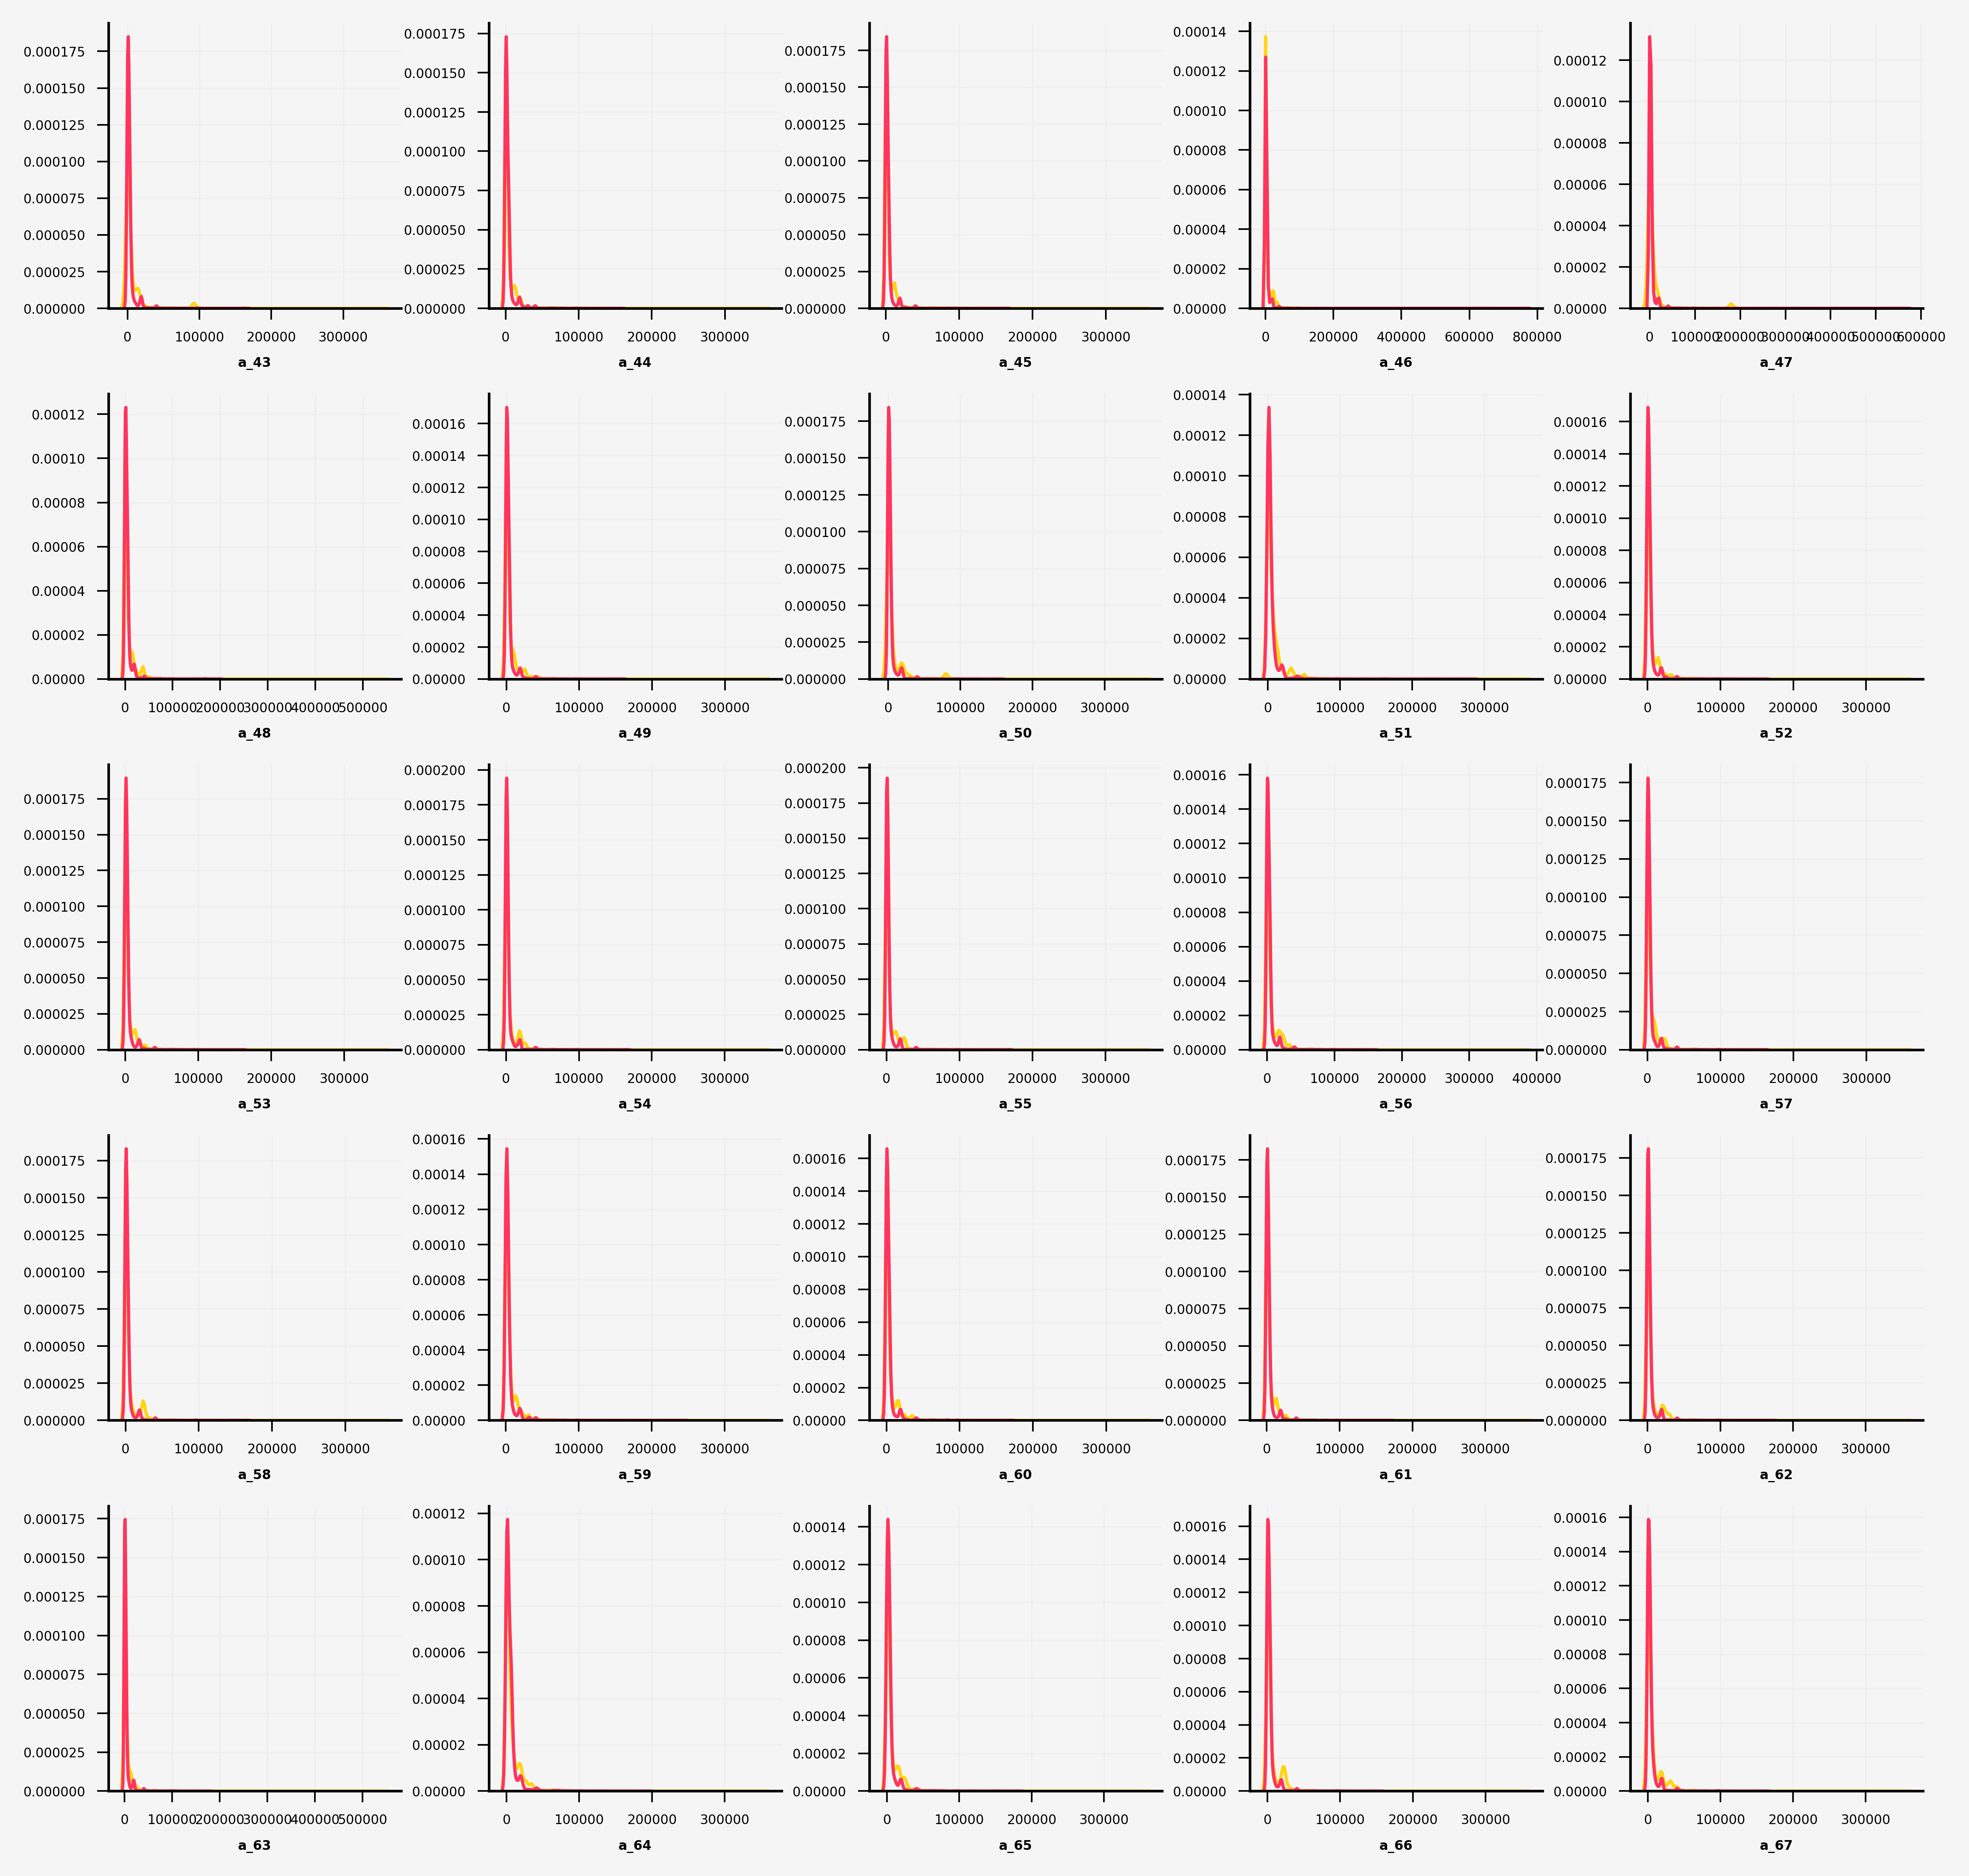

In [18]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

background_color = "#f6f5f5"

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1  
                
features = list(df_train.columns[53:78])

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=df_train[col], zorder=2, alpha=1, linewidth=1, color='#ffd514')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

features = list(df_test.columns[52:77])    
    
run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=df_test[col], zorder=2, alpha=1, linewidth=1, color='#ff355d')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

plt.show()

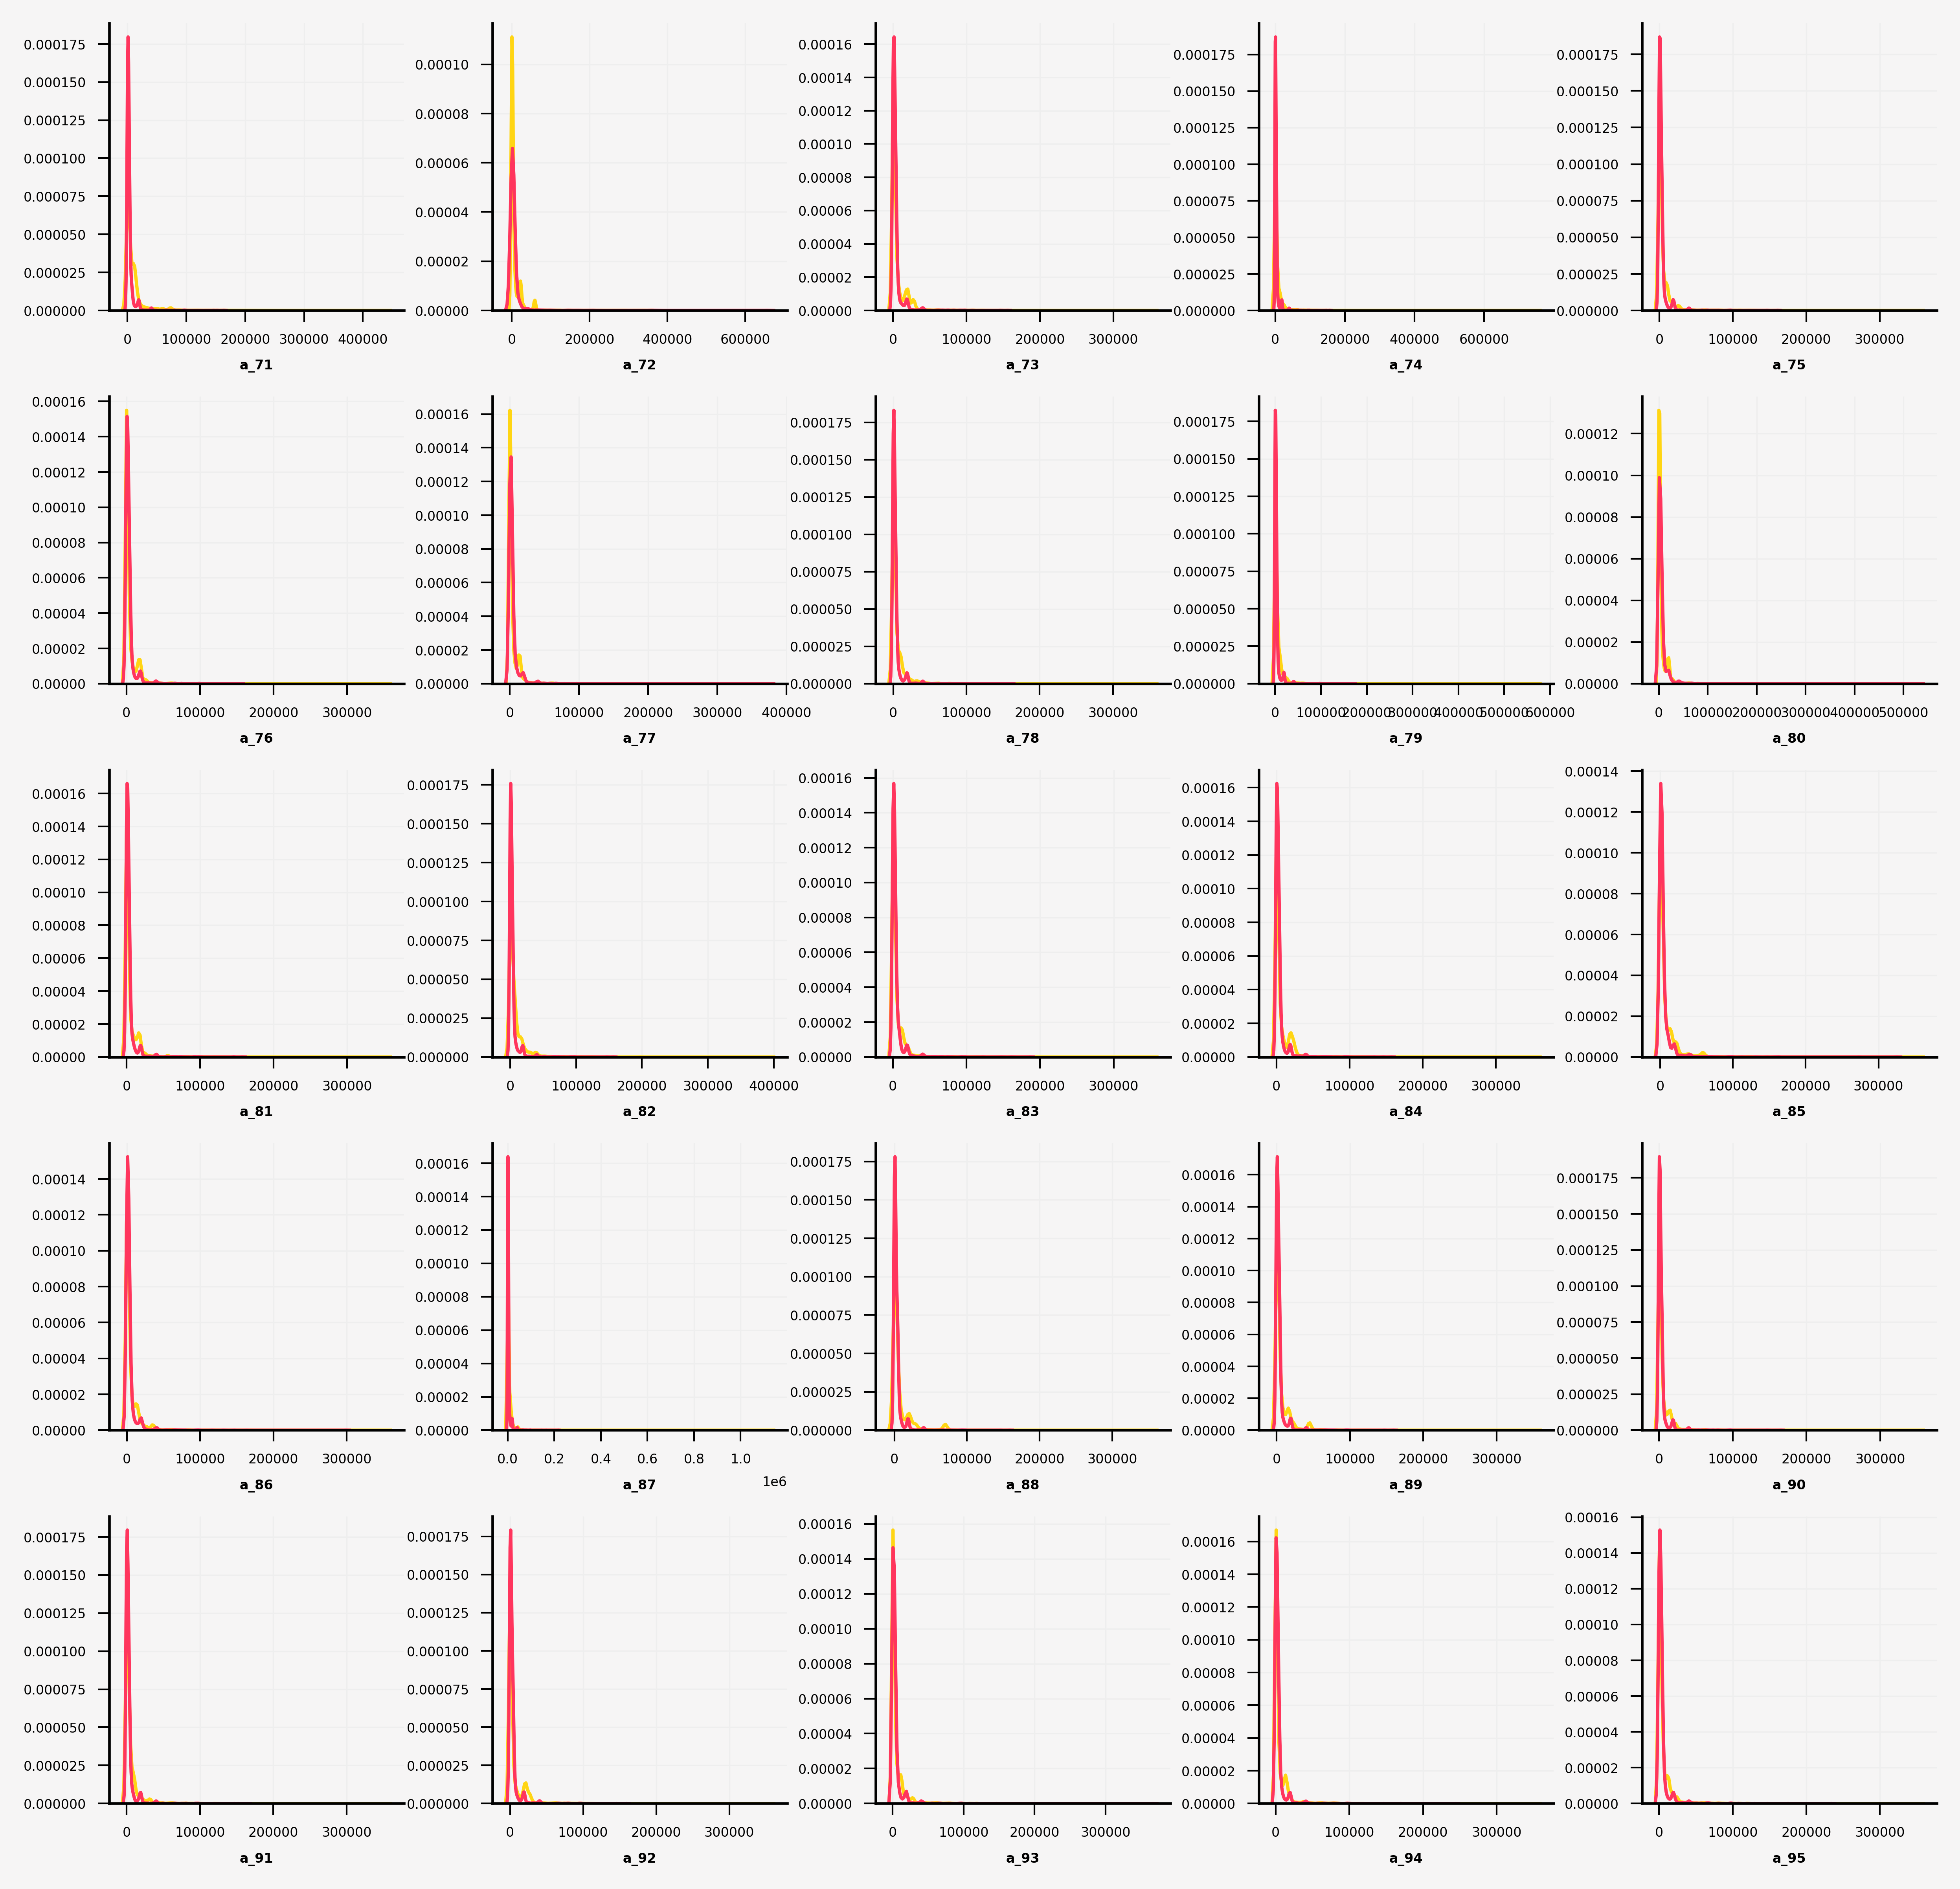

In [19]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

background_color = "#f6f5f5"

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1  
                
features = list(df_train.columns[79:104])

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=df_train[col], zorder=2, alpha=1, linewidth=1, color='#ffd514')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

features = list(df_test.columns[80:105])    
    
run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=df_test[col], zorder=2, alpha=1, linewidth=1, color='#ff355d')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

plt.show()